<a href="https://colab.research.google.com/github/zzong2006/predict_churn_risk_rate/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Churn rate

고객들의 정보를 활용하여 이탈율(churn rate)을 추정하는 문제

[문제 링크](https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-customer-churn/instructions/)

In [29]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [77]:
train_data_path = 'train.csv'
test_data_path = 'test.csv'

train_df = pd.read_csv(filepath_or_buffer=train_data_path)
test_df = pd.read_csv(filepath_or_buffer=test_data_path)

불러온 학습 데이터 확인 

In [78]:
print(train_df.shape)
print(train_df.columns)

(36992, 25)
Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


불러온 테스트 데이터 확인 

In [79]:
print(test_df.shape)
print(test_df.columns)

(19919, 24)
Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')


사용자 정보 중에서 필요해 보이는 정보들만 가져온다.

In [179]:
def features_engineering(df, train_data=True):
    features = ['gender', 'region_category', 'membership_category', 
                'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 
                'points_in_wallet', 'used_special_discount', 
                'offer_application_preference', 'past_complaint', 
                'complaint_status', 'feedback']

    # 학습 데이터 생성
    if train_data:
        y = df['churn_risk_score']
    else:
        y = None
    x = df[features]

    # 일부 feature에 포함된 Nan 값 정리
    x[x['gender'] == 'Unknown'] = np.nan  # gender 특성 중 Unknown 값이 존재함
    num_columns = x.select_dtypes(['int64', 'float64']).columns
    x[num_columns] = x[num_columns].fillna(x[num_columns].mean())

    # 데이터 타입 변환
    # Category
    categorical_features = ['gender', 'region_category', 'membership_category', 
                            'used_special_discount',
                            'offer_application_preference', 'past_complaint', 
                            'complaint_status', 'feedback']
    for ctf in categorical_features:
        x[ctf] = pd.Categorical(x[ctf])
    return x, y

train_x, train_y = features_engineering(train_df)
test_x, test_y = features_engineering(test_df, train_data=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

`SettingWithCopyWarning` 는 무시해도 된다.

이제 변환된 카테고리 데이터를 확인해보자.

In [180]:
for col in train_x:
    if train_x[col].dtype.name == 'category':
        print('Category] ', col, ':', train_x[col].cat.categories )
    if train_x[col].dtype.name == 'object':
        print('Object] ', col, ':', train_x[col].unique() )

Category]  gender : Index(['F', 'M'], dtype='object')
Category]  region_category : Index(['City', 'Town', 'Village'], dtype='object')
Category]  membership_category : Index(['Basic Membership', 'Gold Membership', 'No Membership',
       'Platinum Membership', 'Premium Membership', 'Silver Membership'],
      dtype='object')
Category]  used_special_discount : Index(['No', 'Yes'], dtype='object')
Category]  offer_application_preference : Index(['No', 'Yes'], dtype='object')
Category]  past_complaint : Index(['No', 'Yes'], dtype='object')
Category]  complaint_status : Index(['No Information Available', 'Not Applicable', 'Solved',
       'Solved in Follow-up', 'Unsolved'],
      dtype='object')
Category]  feedback : Index(['No reason specified', 'Poor Customer Service', 'Poor Product Quality',
       'Poor Website', 'Products always in Stock', 'Quality Customer Care',
       'Reasonable Price', 'Too many ads', 'User Friendly Website'],
      dtype='object')


In [181]:
# 학습 데이터의 Nan값 확인
train_x.select_dtypes(['float64', 'int64', 'category']).isna().sum()

gender                            59
region_category                 5479
membership_category               59
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
points_in_wallet                   0
used_special_discount             59
offer_application_preference      59
past_complaint                    59
complaint_status                  59
feedback                          59
dtype: int64

In [182]:
test_x.select_dtypes(['float64', 'int64', 'category']).isna().sum()

gender                            36
region_category                 2981
membership_category               36
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
points_in_wallet                   0
used_special_discount             36
offer_application_preference      36
past_complaint                    36
complaint_status                  36
feedback                          36
dtype: int64

`region_category` 에 포함된 `Nan`값이 많은것 같은데, 카테고리 데이터라 정리할 방법을 잘 모르겠다.
어차피 labeling을 하면, 다른 값들은 `0 ~ N-1` 까지로 치환되고, `Nan` 값은 `-1`로 바꿔지긴 한다.

In [183]:
cat_columns = train_x.select_dtypes(['category']).columns

print('Convert {} to Numeric dtype'.format(cat_columns))

train_x[cat_columns] = train_x[cat_columns].apply(lambda x: x.cat.codes)
test_x[cat_columns] = test_x[cat_columns].apply(lambda x: x.cat.codes)
train_x.head()

Convert Index(['gender', 'region_category', 'membership_category',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback'],
      dtype='object') to Numeric dtype


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,gender,region_category,membership_category,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,0,2,3,17.0,300.63,53005.25,781.750000,1,1,0,1,4
1,0,0,4,16.0,306.34,12838.38,686.872648,1,0,1,2,5
2,0,1,2,14.0,516.16,21027.00,500.690000,0,1,1,3,3
3,1,0,2,11.0,53.27,25239.56,567.660000,0,1,1,4,3
4,0,0,2,20.0,113.13,24483.66,663.060000,0,1,1,2,3


# 모델 생성
RandomForest를 이용한 예측을 수행해보자.

In [173]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(max_depth=len(train_x.columns), random_state=0)
rfc_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

학습을 끝냈으니 예측을 수행해보자.

In [187]:
sum(rfc_model.predict(train_x) == train_y) / len(train_x)

0.8556174307958477

학습 데이터에 대해서는 85% 정도의 정확도를 보인다.

# Submission 생성

In [199]:
submission = pd.DataFrame(data=[test_df['customer_id'].to_numpy(), rfc_model.predict(test_x)], index=['customer_id','churn_risk_score']).T

submission.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5


In [201]:
submission.to_csv(path_or_buf='prediction.csv',index=False)

제출하니 `75.27`점을 받았다. 나는 100명 중 62 등이다. 실제로는 2000 명 정도 submission을 제출했지만, online score가 0점으로 대부분 허수다.

1등의 점수는 `77.05954`점 이다.

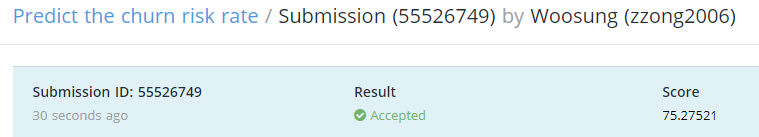